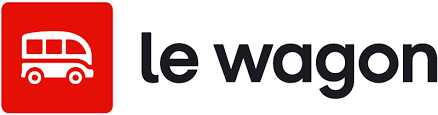

# Predicting house prices

In this challenge, you'll be using your newly acquired Linear Regression skills to try **to predict house prices in Ames, Iowa!**

You'll have to do some more complex preprocessing and when you try to model, things might not go your way...

**Let's get started!**

## Import the Data

Start by importing the data from this link!

[`Iowa_housing_prices.csv`](https://drive.google.com/file/d/1YgFv1_0-xl0blchMvhtUev4vzYX0BFGs/view?usp=sharing)

Load it into a dataframe!

## Cleaning

### Handle NA values

Unlike the previous challenge, this dataset has not been cleaned!

Most important thing to take care of are NA values!

Which columns have missing values?

### To drop or to fill?

Some columns miss many more values than others!

Typically we would drop columns that have more than 30% missing values. For the others, we would fill them using an imputer. But for now, to keep things simple, let's drop all our missing values.

In [8]:
import pandas as pd
file_path = r"C:\Users\dell\Desktop\Iowa_housing_prices.csv"
df = pd.read_csv(file_path)
print(df.head())

df.drop(columns=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],inplace = True)
df.dropna(inplace = True)
null_counts = df.isnull().sum()
#print(null_counts)
print(f"total rows qty:{df.shape[1]}")

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## Picking X and y

After cleaning, we are left with 76 columns/features. That's a lot to choose from! If we were experts in real estate, we could use our domain knowledge and pick out features we know are important!

However, we're not taking that approach today. We'll use all of the features to try to reach a prediction, all 76 of them!

Assign `X` and `y` appropriately! Keep in mind that we are trying to predict house prices!

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['SalePrice'])
y =df[['SalePrice']]

### Train test split
As always, we need to split the data into train and test!

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Normalization

We can't skip this step! However, unlike the previous challenge, we now have non-numeric columns as well that we need to take care of!

### Numeric Values

You have to do it only on numerical data!

<details>
    <summary>Hint:</summary>
fit_transform on your train and transform your test.
</details>

In [22]:
numeric_columns = df.select_dtypes(include=['number'])
print(numeric_columns.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0

### Non-Numeric Values

Now let's try to do the same for the non-numeric columns! Use `select_dtypes` again and maybe change that `include` to something else? Have a look at the documentation!

After you've selected the non-numeric columns, use `OneHotEncoder` to encode the data!

In [24]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

non_numeric_columns = df.select_dtypes(exclude = ['number'])
encoder = OneHotEncoder(sparse_output = False,drop='first')
encoded_columns= pd.DataFrame(encoder.fit_transform(non_numeric_columns),
                              columns=encoder.get_feature_names_out(non_numeric_columns.columns))
                             

Have a look at your encoded columns.

In [26]:
print(encoded_columns.head())

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0          0.0          0.0          1.0          0.0          1.0   
1          0.0          0.0          1.0          0.0          1.0   
2          0.0          0.0          1.0          0.0          1.0   
3          0.0          0.0          1.0          0.0          1.0   
4          0.0          0.0          1.0          0.0          1.0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0           0.0           0.0           1.0              0.0              0.0   
1           0.0           0.0           1.0              0.0              0.0   
2           0.0           0.0           0.0              0.0              0.0   
3           0.0           0.0           0.0              0.0              0.0   
4           0.0           0.0           0.0              0.0              0.0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...             0.0

### Recreate X
Recreate `X` now by combining (concatenating) the numeric and non-numeric normalized columns together! Call it `X_normalized`!

In [38]:
X_normalized= pd.concat([numeric_columns,encoded_columns],axis=1)
print(X_normalized.head())
X_normalized.fillna(X_normalized.mean(),inplace = True)
print(X_normalized.isnull().sum().sum())

    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  1.0        60.0         65.0   8450.0          7.0          5.0     2003.0   
1  2.0        20.0         80.0   9600.0          6.0          8.0     1976.0   
2  3.0        60.0         68.0  11250.0          7.0          5.0     2001.0   
3  4.0        70.0         60.0   9550.0          7.0          5.0     1915.0   
4  5.0        60.0         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0        2003.0       196.0       706.0  ...             0.0             0.0   
1        1976.0         0.0       978.0  ...             0.0             0.0   
2        2002.0       162.0       486.0  ...             0.0             0.0   
3        1970.0         0.0       216.0  ...             0.0             0.0   
4        2000.0       350.0       655.0  ...             0.0             0.0   

   SaleType_New  SaleType_Oth  S

### Try a Linear Regression

Let's try to use a Linear Regression to model house prices!
Instantiate and fit a model!

In [40]:
from sklearn.model_selection import train_test_split

X = X_normalized.drop(columns=['SalePrice'])
y =X_normalized[['SalePrice']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Calculate the MAE

Let's now calculate the mean absolute error of the model on the test set.

In [44]:
from sklearn.metrics import mean_absolute_error
y_test_pred = model.predict(X_test)

MAE =mean_absolute_error(y_test,y_test_pred)
print(f"MAE is:{MAE}")

MAE is:27542.4894189839


That's quite a large number and it represents the amount, in the dollars, by which we were wrong about house prices! **Ouch!**

### What went wrong?

Predicting house prices is, believe it or not, a very complex endeavour! There's not one single quality that determines house prices well, it's one large complex soup of features.

Furthermore, there is a good probability that this is a **non-linear** task! Which would mean that our Linear Regression is ill-suited to handle it.

Whenever you encounter the limitations of a Linear Regression, there's a couple of things that you could try:

- See if there is not a *numerical* data that are *categorical*
- Remove colinear features
- Apply some regularization techniques
- Try non-linear models


## Improve our model

Let's try with fewer features. Select features that are relevant to predict the SalePrice.
<details>
<summary> Answer:</summary>
We can start with the following features ['LotArea', 'LotConfig', 'LotShape', 'MSZoning', 'BldgType', 'Neighborhood', 'GarageCars']
</details>

In [138]:
import pandas as pd
file_path = r"C:\Users\dell\Desktop\Iowa_housing_prices.csv"
df = pd.read_csv(file_path)
# print(df.head())

df.drop(columns=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],inplace = True)
df.dropna(inplace = True)
null_counts = df.isnull().sum()
#print(null_counts)
# print(f"total rows qty:{df.shape[1]}")

df= df[['LotArea', 'LotConfig', 'LotShape', 'MSZoning', 'BldgType', 'Neighborhood', 'GarageCars','SalePrice']]
X=df.drop(columns=['SalePrice'])
y=df['SalePrice']

Split you data.

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)

Be sure that you normalize only data you need to normalize.

In [142]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
num_cols=['LotArea','GarageCars']
other_cols = [col for col in X.columns if col not in num_cols]

X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train[num_cols]),columns=num_cols,index=X_train.index)
X_test_scaled =pd.DataFrame(scaler.transform(X_test[num_cols]),columns=num_cols,index = X_test.index)

X_train = pd.concat([X_train_scaled,X_train[other_cols]],axis =1)
X_test =  pd.concat([X_test_scaled,X_test[other_cols]],axis =1)

print("X_train columns:",X_train.columns)

X_train columns: Index(['LotArea', 'GarageCars', 'LotConfig', 'LotShape', 'MSZoning',
       'BldgType', 'Neighborhood'],
      dtype='object')


Encode your categorical features.

In [144]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# print("X_train columns:",X_train.columns)

categorical_columns=['LotConfig', 'LotShape', 'MSZoning', 'BldgType', 'Neighborhood']
categorical_columns = [col for col in categorical_columns if col in X_train.columns]
# print("Filtered categorical columns:",categorical_columns)

if not categorical_columns:
    raise ValueError("No categorical columns available for encoding in X_train")
    
encoder = OneHotEncoder(drop='first',sparse_output=False)
encoder.fit(X_train[categorical_columns])

X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

X_train_encoded.columns= encoder.get_feature_names_out(categorical_columns)
X_test_encoded.columns= encoder.get_feature_names_out(categorical_columns)

X_train = X_train.drop(columns=categorical_columns).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_columns).reset_index(drop=True)

X_train = pd.concat([X_train,X_train_encoded],axis =1)
X_test =  pd.concat([X_test,X_test_encoded],axis =1)
                       
# print("X_train data types:\n",X_train.dtypes) 
print("X_test data types:\n",X_test.dtypes)  

X_test data types:
 LotArea                 float64
GarageCars              float64
LotConfig_CulDSac       float64
LotConfig_FR2           float64
LotConfig_FR3           float64
LotConfig_Inside        float64
LotShape_IR2            float64
LotShape_IR3            float64
LotShape_Reg            float64
MSZoning_FV             float64
MSZoning_RH             float64
MSZoning_RL             float64
MSZoning_RM             float64
BldgType_2fmCon         float64
BldgType_Duplex         float64
BldgType_Twnhs          float64
BldgType_TwnhsE         float64
Neighborhood_Blueste    float64
Neighborhood_BrDale     float64
Neighborhood_BrkSide    float64
Neighborhood_ClearCr    float64
Neighborhood_CollgCr    float64
Neighborhood_Crawfor    float64
Neighborhood_Edwards    float64
Neighborhood_Gilbert    float64
Neighborhood_IDOTRR     float64
Neighborhood_MeadowV    float64
Neighborhood_Mitchel    float64
Neighborhood_NAmes      float64
Neighborhood_NPkVill    float64
Neighborhood_NWAmes 

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train,y_train)

y_train_pred= model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train =mean_absolute_error(y_train,y_train_pred)
mae_test=mean_absolute_error(y_test,y_test_pred)

print(f"MAE on training set:{mae_train}")
print(f"MAE on test set:{mae_test}")


MAE on training set:30434.2635772839
MAE on test set:34994.07078025738


Let's try again with a Linear regression.

If you choose the right columns, you could see an improvement between `$30,000` and `$40,00`. That's a significant enhancement.

So, it is very important to understand the data you use.

# Optional

All of the above are out of scope for the DA bootcamp, but it's worth knowing about them! We've coded a cell below that uses a **Random Forest Model** to predict house prices! Try to see if you can make some sense of it.

P.S.: You might need to adjust some variable names if we weren't able to guess them right.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train = # your code
X_test = # your code
y_train = # your code
y_test = # your code


rf = RandomForestRegressor(n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_rf

The new MAE should be somewhere around $19,000 now, which is a much more acceptable error for a house price!